# Researcher argreement analysis

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
from wordcloud import WordCloud
import utils
import umap
import hdbscan
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/kylehamilton/MyDocuments/ML-Labs/nuero-symbolic-AI/neuro-symbolic-ai-systematic-review/scopus/utils.py'>

In [2]:
import matplotlib as mpl
plt.style.use('presentation.mplstyle')
mpl.matplotlib_fname()

'/Users/kylehamilton/MyDocuments/ML-Labs/nuero-symbolic-AI/neuro-symbolic-ai-systematic-review/scopus/matplotlibrc'

In [49]:
a=pd.read_csv("scopus-filtered-by-top-publication - Aparna.csv")

In [50]:
a.columns

Index(['Key', 'Item Type', 'Publication Year', 'Author', 'Title',
       'Abstract Note', 'include', 'relavance', 'Unnamed: 8',
       'Publication Title', 'DOI', 'Url', 'Date', 'Date Added',
       'Date Modified', 'Include (0,1)', 'Notes/Criteria'],
      dtype='object')

In [51]:
a=a[['Key','Title','Abstract Note','include']]

In [200]:
k=pd.read_csv("scopus-filtered-by-top-publication - Kyle.csv")

In [201]:
k.columns

Index(['Key', 'Item Type', 'Publication Year', 'Author', 'Title',
       'Include (01)', 'Notes/Criteria', 'Input data', 'Abstract Note',
       'Publication Title', 'DOI', 'Url', 'Date', 'Date Added',
       'Date Modified', 'Scopus relevance order'],
      dtype='object')

In [202]:
k=k[['Key','Title','Include (01)','Abstract Note']]
k=k.rename(columns = {'Include (01)':'include'})

In [203]:
b = pd.merge(a, k, on=["Key"], indicator="merge_indicator")

In [204]:
b=b.rename(columns = {'Title_x':'Title', 'Abstract Note_x':'Abstract','include_x':'include_aparna', 'include_y':'include_kyle'})
b=b[['Key','Title','Abstract','include_aparna','include_kyle']]

In [205]:
b.columns

Index(['Key', 'Title', 'Abstract', 'include_aparna', 'include_kyle'], dtype='object')

In [206]:
b.to_csv('include_comparison.csv',index=False)

In [207]:
both=len(b[(b['include_aparna']==1) & (b['include_kyle']==1)])
aparna=len(b[(b['include_aparna']==1) & (b['include_kyle']==0)])
kyle=len(b[(b['include_aparna']==0) & (b['include_kyle']==1)])

In [208]:
union_ak=b[(b['include_aparna']==1) | (b['include_kyle']==1)].sort_values(by=['include_aparna','include_kyle'],ascending=False)

In [209]:
union_ak.to_csv('include_union.csv',index=False)

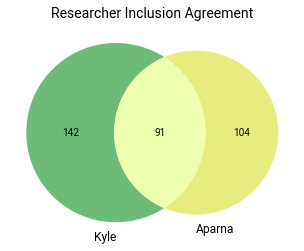

In [210]:
from matplotlib_venn import venn2
venn2(subsets = (kyle, aparna, both), set_labels = ('Kyle', 'Aparna'), alpha=1, set_colors=('#6cbc78', '#e6ec7e'))
plt.title("Researcher Inclusion Agreement")
plt.show()

## TF-IDF
Clearly, there is a lot of disagreement as between researchers as to which articles qualify for inclusion. Let's see if there is a clear difference in our choices.

* vectorizer = TfidfVectorizer(stop_words='english',min_df=0.2,max_df=maxdf,ngram_range=(1,3),strip_accents='unicode')
* Count only words occurring in at least 20% of the documents (min_df).

In [214]:
importlib.reload(utils)

<module 'utils' from '/Users/kylehamilton/MyDocuments/ML-Labs/nuero-symbolic-AI/neuro-symbolic-ai-systematic-review/scopus/utils.py'>

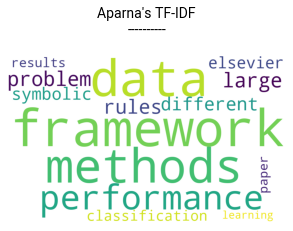

In [215]:
# Aparna's TfIdf tri-grams
ap=b[(b['include_aparna']==1) & (b['include_kyle']==0)]
a_abstracts=list(ap['Abstract'])
text=utils.getTFIDF(a_abstracts,top_n=100,maxdf=1.0)
utils.drawCloud(text,max_words=100,figsize=(5,10),raw=False, title="Aparna's TF-IDF\n----------\n")

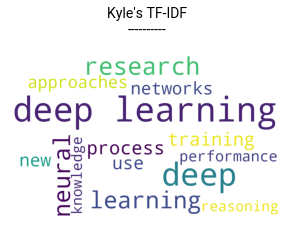

In [193]:
# Kyle's TfIdf
kp=b[(b['include_aparna']==0) & (b['include_kyle']==1)]
k_abstracts=list(kp['Abstract'])
text=utils.getTFIDF(k_abstracts,top_n=100,maxdf=1.0)
utils.drawCloud(text,max_words=100,figsize=(5,10),raw=False, title="Kyle's TF-IDF\n----------\n")

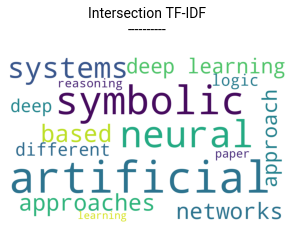

In [194]:
# Intersection TfIdf
ab=b[(b['include_aparna']==1) & (b['include_kyle']==1)]
a_abstracts=list(ab['Abstract'])
text=utils.getTFIDF(a_abstracts,top_n=100,maxdf=1.0)
utils.drawCloud(text,max_words=100,figsize=(5,5),raw=False, title="Intersection TF-IDF\n----------\n")